In [1]:
import sys
sys.path.append('../SF_history')
import sf_history
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


%matplotlib inline

/Library/Python/2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
lmc_sfh = sf_history.load_lmc_sfh()
lmc_coor = sf_history.load_lmc_coor()
smc_sfh = sf_history.load_smc_sfh()
smc_coor = sf_history.load_smc_coor()

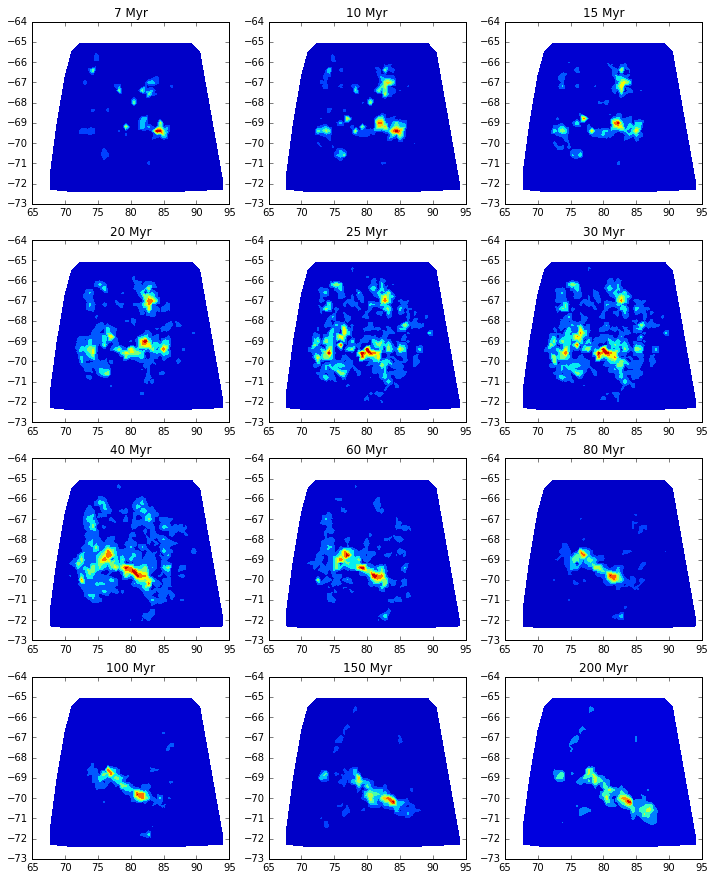

In [4]:
sf_history.test_LMC_SFH_plots()

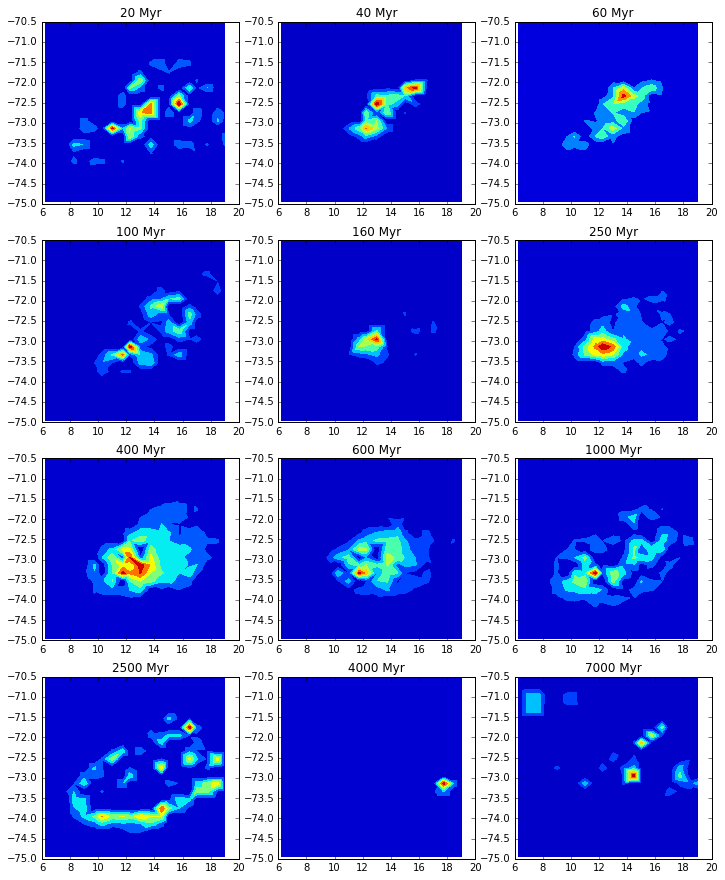

In [5]:
sf_history.test_SMC_SFH_plots()

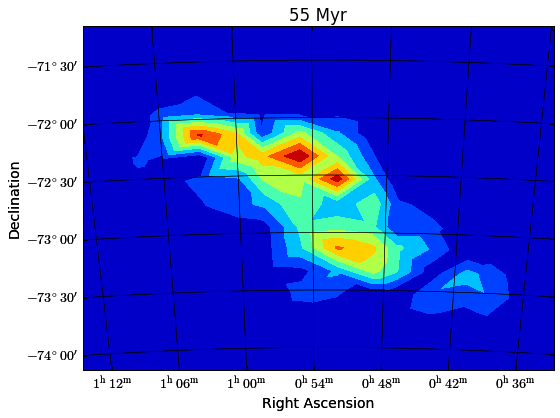

In [2]:
plt.rc('font', size=14)

sf_history.get_SMC_plot_polar(25.0)
plt.tight_layout()
plt.savefig('../figures/SMC_SF_25Myr.pdf')

sf_history.get_SMC_plot_polar(35.0)
plt.tight_layout()
plt.savefig('../figures/SMC_SF_35Myr.pdf')

sf_history.get_SMC_plot_polar(45.0)
plt.tight_layout()
plt.savefig('../figures/SMC_SF_45Myr.pdf')

sf_history.get_SMC_plot_polar(55.0)
plt.tight_layout()
plt.savefig('../figures/SMC_SF_55Myr.pdf')



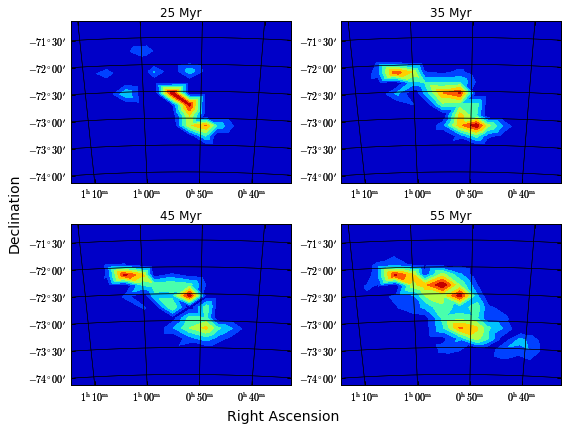

In [6]:
fig, ax = plt.subplots(2,2, figsize=(8,6))
plt.rc('font', size=10)

# Remove original x,y ticks
ax[0,0].set_xticks([])
ax[0,0].set_yticks([])

ax[1,0].set_xticks([])
ax[1,0].set_yticks([])

ax[0,1].set_xticks([])
ax[0,1].set_yticks([])

ax[1,1].set_xticks([])
ax[1,1].set_yticks([])

# SF history plots
sf_history.get_SMC_plot_polar(25.0, fig_in=fig, rect=221, xlabel=None, ylabel=None, xgrid_density=5, ygrid_density=5)
sf_history.get_SMC_plot_polar(35.0, fig_in=fig, rect=222, xlabel=None, ylabel=None, xgrid_density=5, ygrid_density=5)
sf_history.get_SMC_plot_polar(45.0, fig_in=fig, rect=223, xlabel=None, ylabel=None, xgrid_density=5, ygrid_density=5)
sf_history.get_SMC_plot_polar(55.0, fig_in=fig, rect=224, xlabel=None, ylabel=None, xgrid_density=5, ygrid_density=5)

# Axes labels
fig.text(0.5, 0.02, 'Right Ascension', ha='center', fontsize=14)
fig.text(0.02, 0.5, 'Declination', va='center', rotation='vertical', fontsize=14)

plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.10, left=0.13)


plt.savefig('../figures/SMC_SF_history.pdf')


In [9]:
def get_SMC_plot(age):
    sfr = np.array([])
    for i in np.arange(len(smc_coor)):
        sfr = np.append(sfr, sf_history.get_SFH(smc_coor["ra"][i], \
                        smc_coor["dec"][i], age, smc_coor, smc_sfh))

    plt.tricontourf(smc_coor["ra"], smc_coor["dec"], sfr)
    plt.title(str(int(age)) + ' Myr')

    return plt

def get_LMC_plot(age):
    sfr = np.array([])
    for i in np.arange(len(lmc_coor)):
        sfr = np.append(sfr, sf_history.get_SFH(lmc_coor["ra"][i], \
                        lmc_coor["dec"][i], age, lmc_coor, lmc_sfh))

    plt.tricontourf(lmc_coor["ra"], lmc_coor["dec"], sfr)
    plt.title(str(int(age)) + ' Myr')
    plt.ylim(-73, -64)

    return plt


[11.396916666666666, -73.31758888888889]


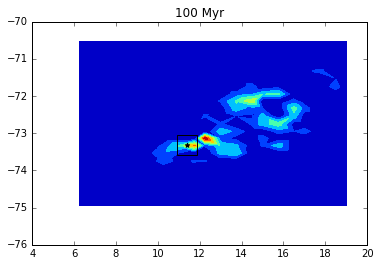

In [27]:
from astropy.coordinates import SkyCoord
from astropy import units as u

coor_J0045 = SkyCoord('00h45m35.26s', '-73d19m03.32s')
coor_J0045 = [coor_J0045.ra.degree, coor_J0045.dec.degree]


get_SMC_plot(100.0)

plt.scatter(coor_J0045[0], coor_J0045[1], marker="*", s=20, color='k')
plt.scatter(coor_J0045[0], coor_J0045[1], marker="s", s=400, color='k', facecolors='none')

plt.show()